In [6]:
from PIL import Image
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2

from segment import segment


In [52]:
LEARNING_RATE = 1e-4
#DEVICE = "cpu"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 3
NUM_EPOCHS = 2
NUM_WORKERS = 2
IMAGE_HEIGHT = 256  # 1280 originally
IMAGE_WIDTH = 256  # 1918 originally
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = "dtsub/train_input/"
TRAIN_MASK_DIR = "dtsub/train_mask/"
VAL_IMG_DIR = "dtsub/val_input/"
VAL_MASK_DIR = "dtsub/val_mask/"
RES_DIR = "result/"
GROUPBY_list = [3,5]
PAD_VALUE = 0
NUM_CLASS = 2
IGNORE_INDEX = -1
DISPLAY_STEP = 50
VAL_EVERY = 1
VAL_AFTER = 0
ALL_MASK_list = [list(range(gp)) for gp in GROUPBY_list]
MODEL_PTH_SAVE_list = []
FOLD_GROUPBY_list = []
for i, gp in enumerate(GROUPBY_list):
    tmp = []
    FOLD_GROUPBY_list.append(f'Groupby_{gp}_result')
    for ms in ALL_MASK_list[i]: 
        tmp.append(f"model_groupby_{gp}_maskpos_{ms}.pth.tar")
    

    MODEL_PTH_SAVE_list.append(tmp)

In [51]:
MODEL_PTH_SAVE_list = []
FOLD_GROUPBY_list = []
for i, gp in enumerate(GROUPBY_list):
    tmp = []
    FOLD_GROUPBY_list.append(f'Groupby_{gp}_result')
    for ms in ALL_MASK_list[i]: 
        tmp.append(f"model_groupby_{gp}_maskpos_{ms}.pth.tar")
    

FOLD_GROUPBY_list

['Groupby_3_result', 'Groupby_5_result']

In [42]:
MODEL_PTH_SAVE_list

[['model_groupby_3_maskpos_0.pth.tar',
  'model_groupby_3_maskpos_1.pth.tar',
  'model_groupby_3_maskpos_2.pth.tar'],
 ['model_groupby_5_maskpos_0.pth.tar',
  'model_groupby_5_maskpos_1.pth.tar',
  'model_groupby_5_maskpos_2.pth.tar',
  'model_groupby_5_maskpos_3.pth.tar',
  'model_groupby_5_maskpos_4.pth.tar'],
 ['model_groupby_7_maskpos_0.pth.tar',
  'model_groupby_7_maskpos_1.pth.tar',
  'model_groupby_7_maskpos_2.pth.tar',
  'model_groupby_7_maskpos_3.pth.tar',
  'model_groupby_7_maskpos_4.pth.tar',
  'model_groupby_7_maskpos_5.pth.tar',
  'model_groupby_7_maskpos_6.pth.tar'],
 ['model_groupby_9_maskpos_0.pth.tar',
  'model_groupby_9_maskpos_1.pth.tar',
  'model_groupby_9_maskpos_2.pth.tar',
  'model_groupby_9_maskpos_3.pth.tar',
  'model_groupby_9_maskpos_4.pth.tar',
  'model_groupby_9_maskpos_5.pth.tar',
  'model_groupby_9_maskpos_6.pth.tar',
  'model_groupby_9_maskpos_7.pth.tar',
  'model_groupby_9_maskpos_8.pth.tar'],
 ['model_groupby_11_maskpos_0.pth.tar',
  'model_groupby_11_

In [49]:
import os
path = "petit_test/"
for fold in FOLD_GROUPBY_list:

    # Check whether the specified path exists or not
    directory = os.path.join(path,fold)
    isExist = os.path.exists(directory)
    if not isExist:

   # Create a new directory because it does not exist
        os.makedirs(directory)
        print("The new directory is created!")

The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!


In [53]:
for p, GROUPBY in enumerate(GROUPBY_list):
    FOLD_GROUPBY = FOLD_GROUPBY_list[p]
    print("Groupby : ", GROUPBY, FOLD_GROUPBY)

    for m, MASK_POS in enumerate(ALL_MASK_list[p]):
        MODEL_PTH_SAVE = MODEL_PTH_SAVE_list[p][m]
        print("Mask pos: ", MASK_POS, MODEL_PTH_SAVE )

Groupby :  3 Groupby_3_result
Mask pos:  0 model_groupby_3_maskpos_0.pth.tar
Mask pos:  1 model_groupby_3_maskpos_1.pth.tar
Mask pos:  2 model_groupby_3_maskpos_2.pth.tar
Groupby :  5 Groupby_5_result
Mask pos:  0 model_groupby_5_maskpos_0.pth.tar
Mask pos:  1 model_groupby_5_maskpos_1.pth.tar
Mask pos:  2 model_groupby_5_maskpos_2.pth.tar
Mask pos:  3 model_groupby_5_maskpos_3.pth.tar
Mask pos:  4 model_groupby_5_maskpos_4.pth.tar


In [2]:
path_pred0 = r'processing_im/set_0_time_27_mask.png'


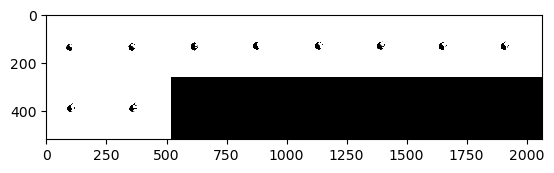

In [3]:
path_pred0 = r'processing_im/pred_0.png'
pred = Image.open(path_pred0).convert('L')
pred_arr = np.array(pred, dtype=np.float32)
pred_arr
plt.imshow(pred_arr,cmap='gray',vmin=0,vmax=1)

In [12]:
img[250,250]

255

In [10]:
img = cv2.imread(path_pred0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('img', img)
# waits for user to press any key
cv2.waitKey(0)
  
# closing all open windows
cv2.destroyAllWindows()

In [4]:
import torchvision
mask_torch = torch.from_numpy(pred_arr).float()
mask_torch.shape
#preds = torchvision.transforms.functional.invert(mask_torch)

torch.Size([518, 2066])

torch.Size([518])